In [57]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('911.csv')
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [10]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [26]:
df.sort_values(by=['zip']).head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
8367,41.167156,-76.874030,MAIN; ; Station 308A; 2016-01-02 @ 13:01:30;,17752.0,EMS: UNKNOWN MEDICAL EMERGENCY,2016-01-02 13:06:00,NaN,MAIN,1
41689,40.453790,-75.459977,MILL HILL RD & ORCHARD RD; LEHIGH COUNTY; Sta...,18036.0,EMS: RESPIRATORY EMERGENCY,2016-03-26 07:22:00,LEHIGH COUNTY,MILL HILL RD & ORCHARD RD,1
26763,40.456517,-75.463066,ORCHARD RD & SCHOOL HOUSE LN; LEHIGH COUNTY; ...,18036.0,EMS: CHOKING,2016-02-15 16:07:01,LEHIGH COUNTY,ORCHARD RD & SCHOOL HOUSE LN,1
95602,40.403330,-75.510632,COLONIAL DR & HAMILTON RD; EAST GREENVILLE; 20...,18041.0,Traffic: VEHICLE ACCIDENT -,2016-08-14 09:42:02,EAST GREENVILLE,COLONIAL DR & HAMILTON RD,1
88215,40.392254,-75.515893,CHURCH RD; UPPER HANOVER; Station 369; 2016-0...,18041.0,EMS: VEHICLE ACCIDENT,2016-07-26 16:02:02,UPPER HANOVER,CHURCH RD,1


In [37]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [36]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [44]:
df['title'].nunique()

110

In [53]:

    
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [56]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

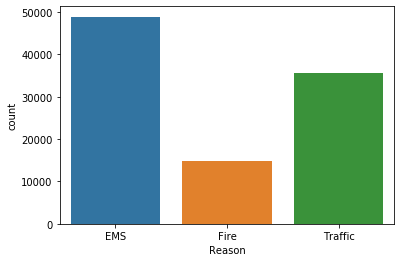

In [60]:

sns.countplot(x="Reason", data=df)

In [81]:
type('timeStamp')

str

In [180]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])


In [187]:

df['Month'] = df['timeStamp'].apply(lambda x: x.month)


df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

df['Day Of Week'] = df['timeStamp'].apply(lambda x: x.weekday())


In [188]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['Day Of Week'] = df['timeStamp'].apply(lambda x: x.weekday()).map(dmap)


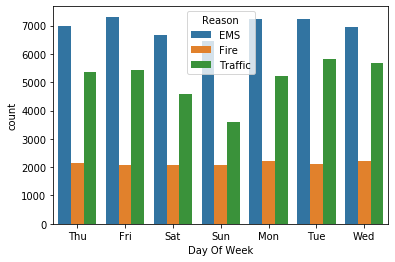

In [189]:
sns.countplot(x='Day Of Week', hue = 'Reason', data= df )

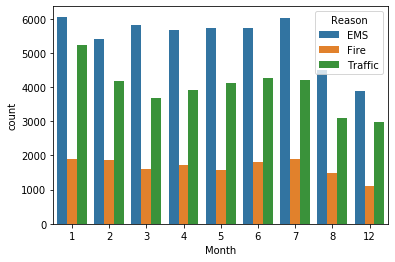

In [202]:
sns.countplot(x='Month', hue = 'Reason', data= df ,dodge=bool)

In [192]:
byMonth = df.groupby('Month').count()

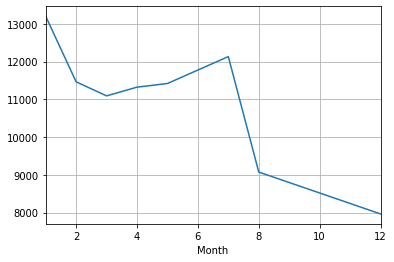

In [197]:
byMonth['twp'].plot(kind='line',grid='bool')

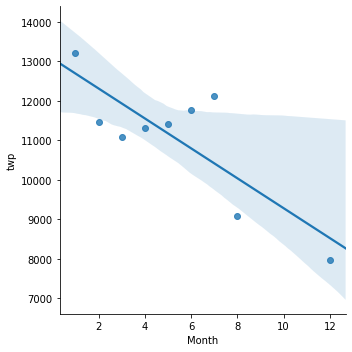

In [236]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index(),palette="Set1")

In [210]:
df['Date'] = df['timeStamp'].apply(lambda timestamp: timestamp.date())

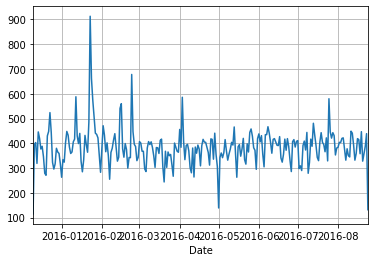

In [212]:
df.groupby('Date').count()['twp'].plot(grid=bool)

Text(0.5, 1.0, 'EMS')

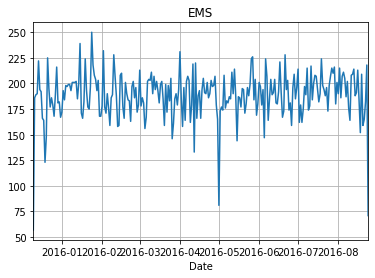

In [216]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot(grid=bool)
plt.title('EMS')

Text(0.5, 1.0, 'Fire')

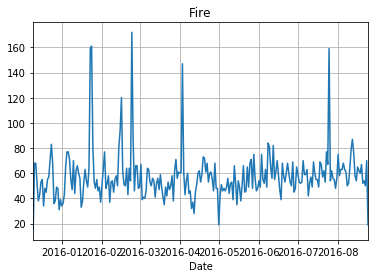

In [218]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot(grid=bool)

plt.title('Fire')

Text(0.5, 1.0, 'Traffic')

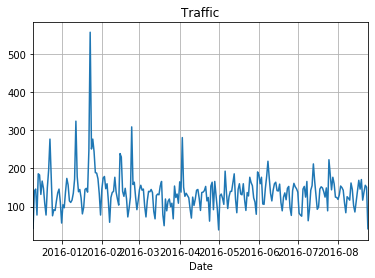

In [220]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot(grid=bool)
plt.title('Traffic')

Text(0.5, 1.0, 'EMS')

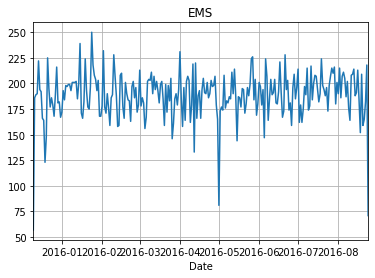

In [221]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot(grid=bool)
plt.title('EMS')

In [233]:
dayHour = df.groupby(by=['Day Of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day Of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


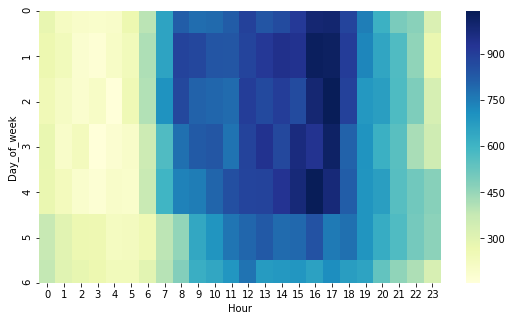

In [227]:
plt.figure(figsize=(9,5))
sns.heatmap(dayHour, cmap="YlGnBu")


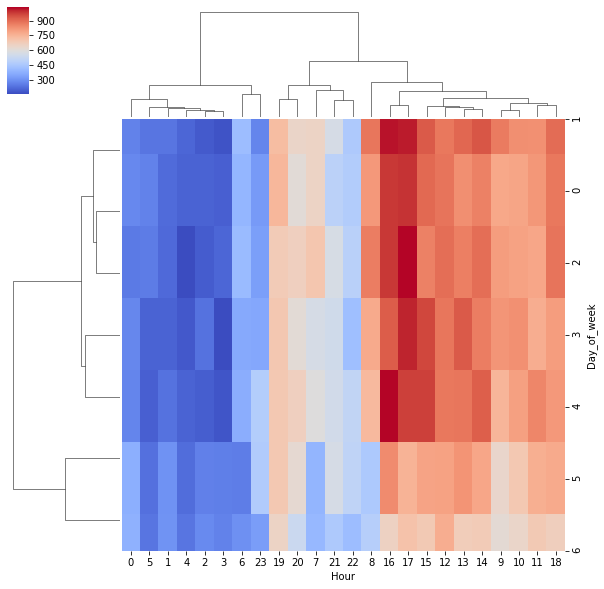

In [229]:
sns.clustermap(dayHour,cmap='coolwarm')

In [234]:
Days_to_Month = df.groupby(by=['Day Of Week','Month']).count()['Reason'].unstack()

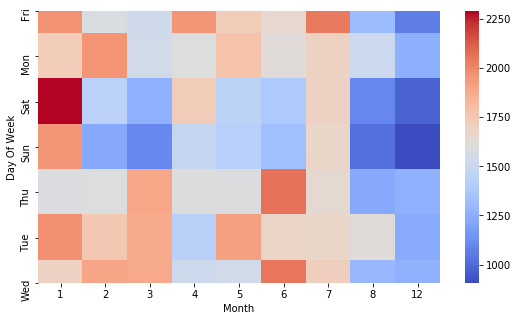

In [237]:
plt.figure(figsize=(9,5))
sns.heatmap(Days_to_Month, cmap='coolwarm')


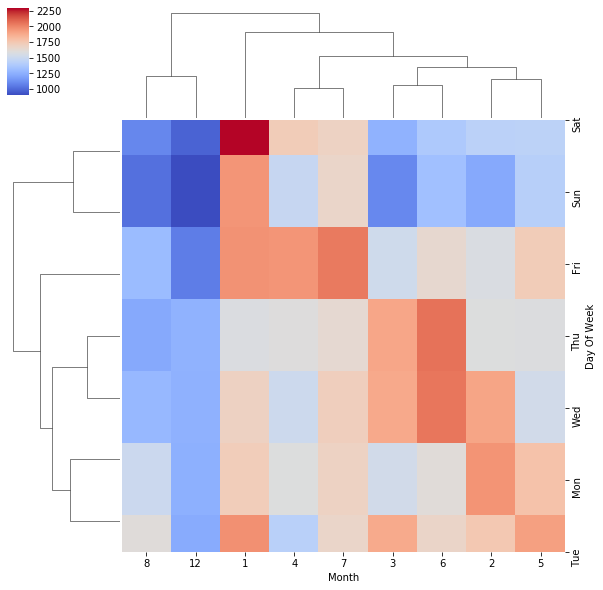

In [239]:
sns.clustermap(Days_to_Month,cmap='coolwarm')